In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.manifold import TSNE
import umap

sns.set_theme(style="whitegrid")

In [10]:
def load_data(filepath):
    """
    Load dataset from a space-separated file.
    
    Parameters:
        filepath (str): Path to the data file.
        
    Returns:
        np.ndarray: Loaded data as a numpy array.
    """
    return np.loadtxt(filepath)

data = load_data("pca_data.txt")
print(f"Data shape: {data.shape}")

Data shape: (1000, 500)


In [11]:
def perform_pca(data, n_components):
    """
    Perform PCA on the dataset.
    
    Parameters:
        data (np.ndarray): The input data (samples x features).
        n_components (int): Number of principal components to retain.
        
    Returns:
        np.ndarray: Transformed data with reduced dimensions.
        np.ndarray: Top n_components eigenvectors.
        np.ndarray: Eigenvalues sorted in descending order.
    """
    # Center the data
    data_mean = np.mean(data, axis=0)
    centered_data = data - data_mean
    
    # Compute covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)
    
    # Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select top n_components
    top_eigenvectors = eigenvectors[:, :n_components]
    transformed_data = np.dot(centered_data, top_eigenvectors)
    
    return transformed_data, top_eigenvectors, eigenvalues

# Perform PCA to reduce to 2 components
pca_transformed_data, _, _ = perform_pca(data, n_components=2)


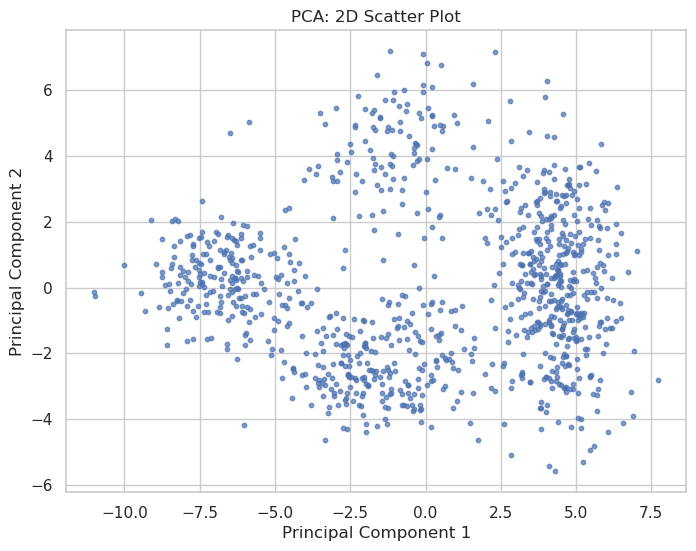

In [ ]:
def plot_2d_scatter(data, title):
    """
    Create a 2D scatter plot of the data.
    
    Parameters:
        data (np.ndarray): Data to plot (samples x 2 dimensions).
        title (str): Title for the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.7)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

# Plot PCA result
plot_2d_scatter(pca_transformed_data, "PCA: 2D Scatter Plot")

/home/asifazad/installations/miniconda3/envs/ml/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


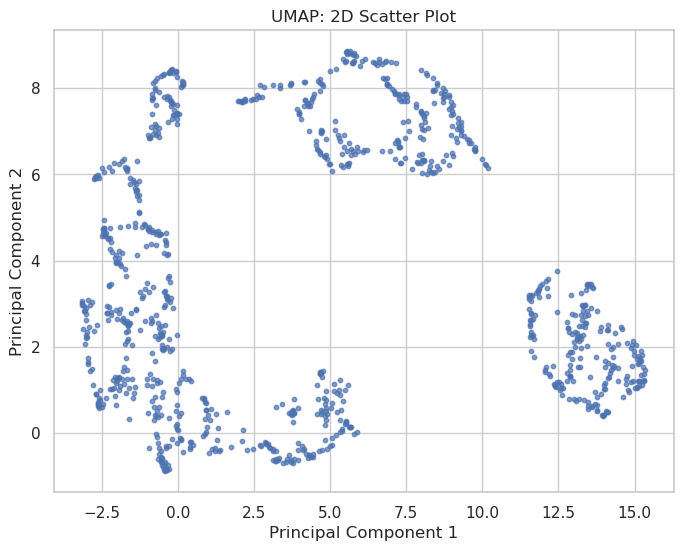

In [7]:
def perform_umap(data, n_neighbors=15, min_dist=0.1, n_components=2):
    """
    Perform UMAP dimensionality reduction on the dataset.
    
    Parameters:
        data (np.ndarray): Input data.
        n_neighbors (int): Number of neighbors for UMAP.
        min_dist (float): Minimum distance for UMAP.
        n_components (int): Number of dimensions to reduce to.
        
    Returns:
        np.ndarray: UMAP reduced data.
    """
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
    return reducer.fit_transform(data)

# Perform UMAP
umap_transformed_data = perform_umap(data)

# Plot UMAP result
plot_2d_scatter(umap_transformed_data, "UMAP: 2D Scatter Plot")


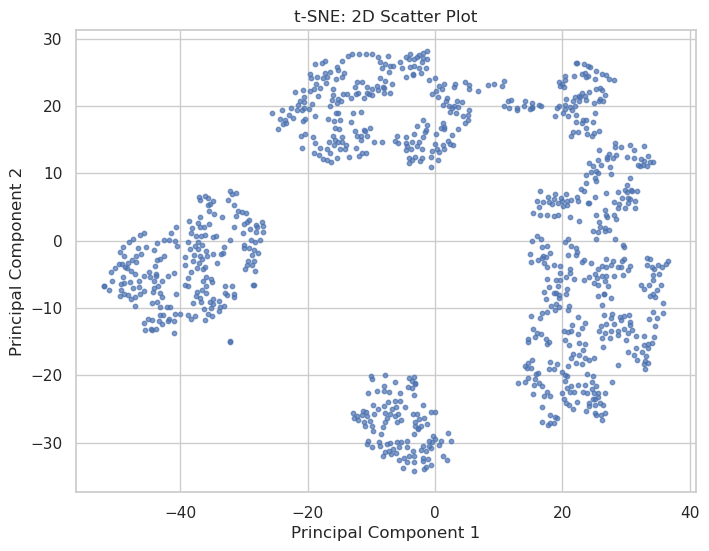

In [ ]:
def perform_tsne(data, n_components=2, perplexity=30, random_state=42):
    """
    Perform t-SNE dimensionality reduction on the dataset.
    
    Parameters:
        data (np.ndarray): Input data.
        n_components (int): Number of dimensions to reduce to.
        perplexity (float): Perplexity for t-SNE.
        random_state (int): Random seed for reproducibility.
        
    Returns:
        np.ndarray: t-SNE reduced data.
    """
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state)
    return tsne.fit_transform(data)

# Perform t-SNE
tsne_transformed_data = perform_tsne(data)

# Plot t-SNE result
plot_2d_scatter(tsne_transformed_data, "t-SNE: 2D Scatter Plot")